<h1 style="font-size:6rem; color:red">Civil Aviation Accidents</h1>

<h2 style="font-size:4rem; color:orange">Reading and Importing the Necessary Files</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

ci_df = pd.read_csv('aviation-accident.csv')
ci_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


<h2 style="font-size:4rem; color:orange">Filtering Data</h2>

# Filtering Dates by removing 'date unk.' and '?'

In [2]:
ci_df = ci_df[~ci_df['date'].str.contains('date unk.')]
ci_df = ci_df[~ci_df['date'].str.contains('\?')]
ci_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
61,02-AUG-1919,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920


# Filtering registration by removing 'NaN' and '-'

In [3]:
ci_df = ci_df[~ci_df['registration'].isna()]
ci_df = ci_df[~ci_df['registration'].str.contains('-')]
ci_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
105,23-NOV-1928,Ford 4-AT-B Tri-Motor,NC7687,Spokane Airways,3,"Moran Prairie, S...",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928


# Filtering fatalities by removing 'NaN' and '+'

In [4]:
ci_df = ci_df[~ci_df['fatalities'].isna()]
ci_df = ci_df[~ci_df['fatalities'].str.contains('\+')]
ci_df = ci_df[~ci_df['fatalities'].str.contains(' ')]
ci_df.head(40)

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
105,23-NOV-1928,Ford 4-AT-B Tri-Motor,NC7687,Spokane Airways,3,"Moran Prairie, S...",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928
108,22-DEC-1928,Ford 4-AT-A Tri-Motor,NC3443,Texaco,0,"Floresville, TX",USA,A1,1928
110,16-JAN-1929,Ford 4-AT-A Tri-Motor,NC1076,Stout Air Services,0,"near Toledo, OH",USA,A1,1929
112,17-MAR-1929,Ford 4-AT-B Tri-Motor,NC7683,Colonial Western Airlines,14,"near Newark Airport, ...",USA,A1,1929
113,19-MAR-1929,Ford 5-AT-B Tri-Motor,NC9674,Ford Motor Company,4,"Dearborn, MI",USA,A1,1929
118,02-JUN-1929,Fokker F.10A,NC393E,Western Air Express,0,"Wichita, KS",USA,O1,1929


# Filtering location by removing 'NaN' and 'special char'

In [5]:
ci_df = ci_df[~ci_df['location'].isna()]
ci_df = ci_df[~ci_df['location'].str.contains('Â')]

ci_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
105,23-NOV-1928,Ford 4-AT-B Tri-Motor,NC7687,Spokane Airways,3,"Moran Prairie, S...",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928


# Filtering country by removing 'NaN', 'unknowns' and '?'

In [6]:
ci_df = ci_df[~ci_df['country'].isna()]
ci_df = ci_df[~ci_df['country'].str.contains('Unknown country')]
ci_df = ci_df[~ci_df['country'].str.contains('\?')]
ci_df.head(40)

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
105,23-NOV-1928,Ford 4-AT-B Tri-Motor,NC7687,Spokane Airways,3,"Moran Prairie, S...",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928
108,22-DEC-1928,Ford 4-AT-A Tri-Motor,NC3443,Texaco,0,"Floresville, TX",USA,A1,1928
110,16-JAN-1929,Ford 4-AT-A Tri-Motor,NC1076,Stout Air Services,0,"near Toledo, OH",USA,A1,1929
112,17-MAR-1929,Ford 4-AT-B Tri-Motor,NC7683,Colonial Western Airlines,14,"near Newark Airport, ...",USA,A1,1929
113,19-MAR-1929,Ford 5-AT-B Tri-Motor,NC9674,Ford Motor Company,4,"Dearborn, MI",USA,A1,1929
118,02-JUN-1929,Fokker F.10A,NC393E,Western Air Express,0,"Wichita, KS",USA,O1,1929


# Filtering year by removing 'unknown year'

In [7]:
ci_df = ci_df[~ci_df['year'].str.contains('unknown')]
ci_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
105,23-NOV-1928,Ford 4-AT-B Tri-Motor,NC7687,Spokane Airways,3,"Moran Prairie, S...",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928


<h2 style="font-size:4rem; color:orange">Saving New .csv to Check Possibility of Defect</h2>

# Filtering location by removing '...'

In [8]:
civ1_df = ci_df.copy()

civ1_df['location'] = civ1_df['location'].astype(str)
civ1_df = civ1_df[~civ1_df['location'].str.contains('[^\x00-\x7F]', regex=True)]

civ1_df = civ1_df[~civ1_df['location'].str.endswith('...')]

civ1_df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
100,12-MAY-1928,Ford 4-AT-A Tri-Motor,NC1492,Ford Air Freight Lines,2,"Dearborn, MI",USA,A1,1928
104,13-OCT-1928,Ford 4-AT-A Tri-Motor,NC880,Stout Air Services,0,"Detroit, MI",USA,A1,1928
106,01-DEC-1928,Ford 4-AT-C Tri-Motor,NC7862,Sunbeam Air Transport Co.,5,"near Spur, TX",USA,A1,1928
108,22-DEC-1928,Ford 4-AT-A Tri-Motor,NC3443,Texaco,0,"Floresville, TX",USA,A1,1928


# Attempt Saving Again

In [40]:
civ1_df.to_csv('filtered.csv')

<h2 style="font-size:3rem; color:green">Which year saw the most fatalities?</h2> 

# Making a new dataframe

In [9]:
select = civ1_df[['date', 'fatalities']]
year_df = pd.DataFrame(select)
year_df.head()

,date,fatalities
62,11-AUG-1919,1
100,12-MAY-1928,2
104,13-OCT-1928,0
106,01-DEC-1928,5
108,22-DEC-1928,0


# Creating a new column Year and converting to int

In [10]:
year_df['Year'] = year_df['date'].str.split('-').str[2]
year_df['Year'] = year_df['Year'].astype('int32')
year_df['fatalities'] = year_df['fatalities'].astype('int32')
year_df.head()

,date,fatalities,Year
62,11-AUG-1919,1,1919
100,12-MAY-1928,2,1928
104,13-OCT-1928,0,1928
106,01-DEC-1928,5,1928
108,22-DEC-1928,0,1928


<h2 style="font-size:4rem; color:orange">Plotting Year against Fatalities</h2>

C:\Users\araiz\AppData\Local\Temp\ipykernel_15404\407039072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = year_df.groupby('Year').sum()


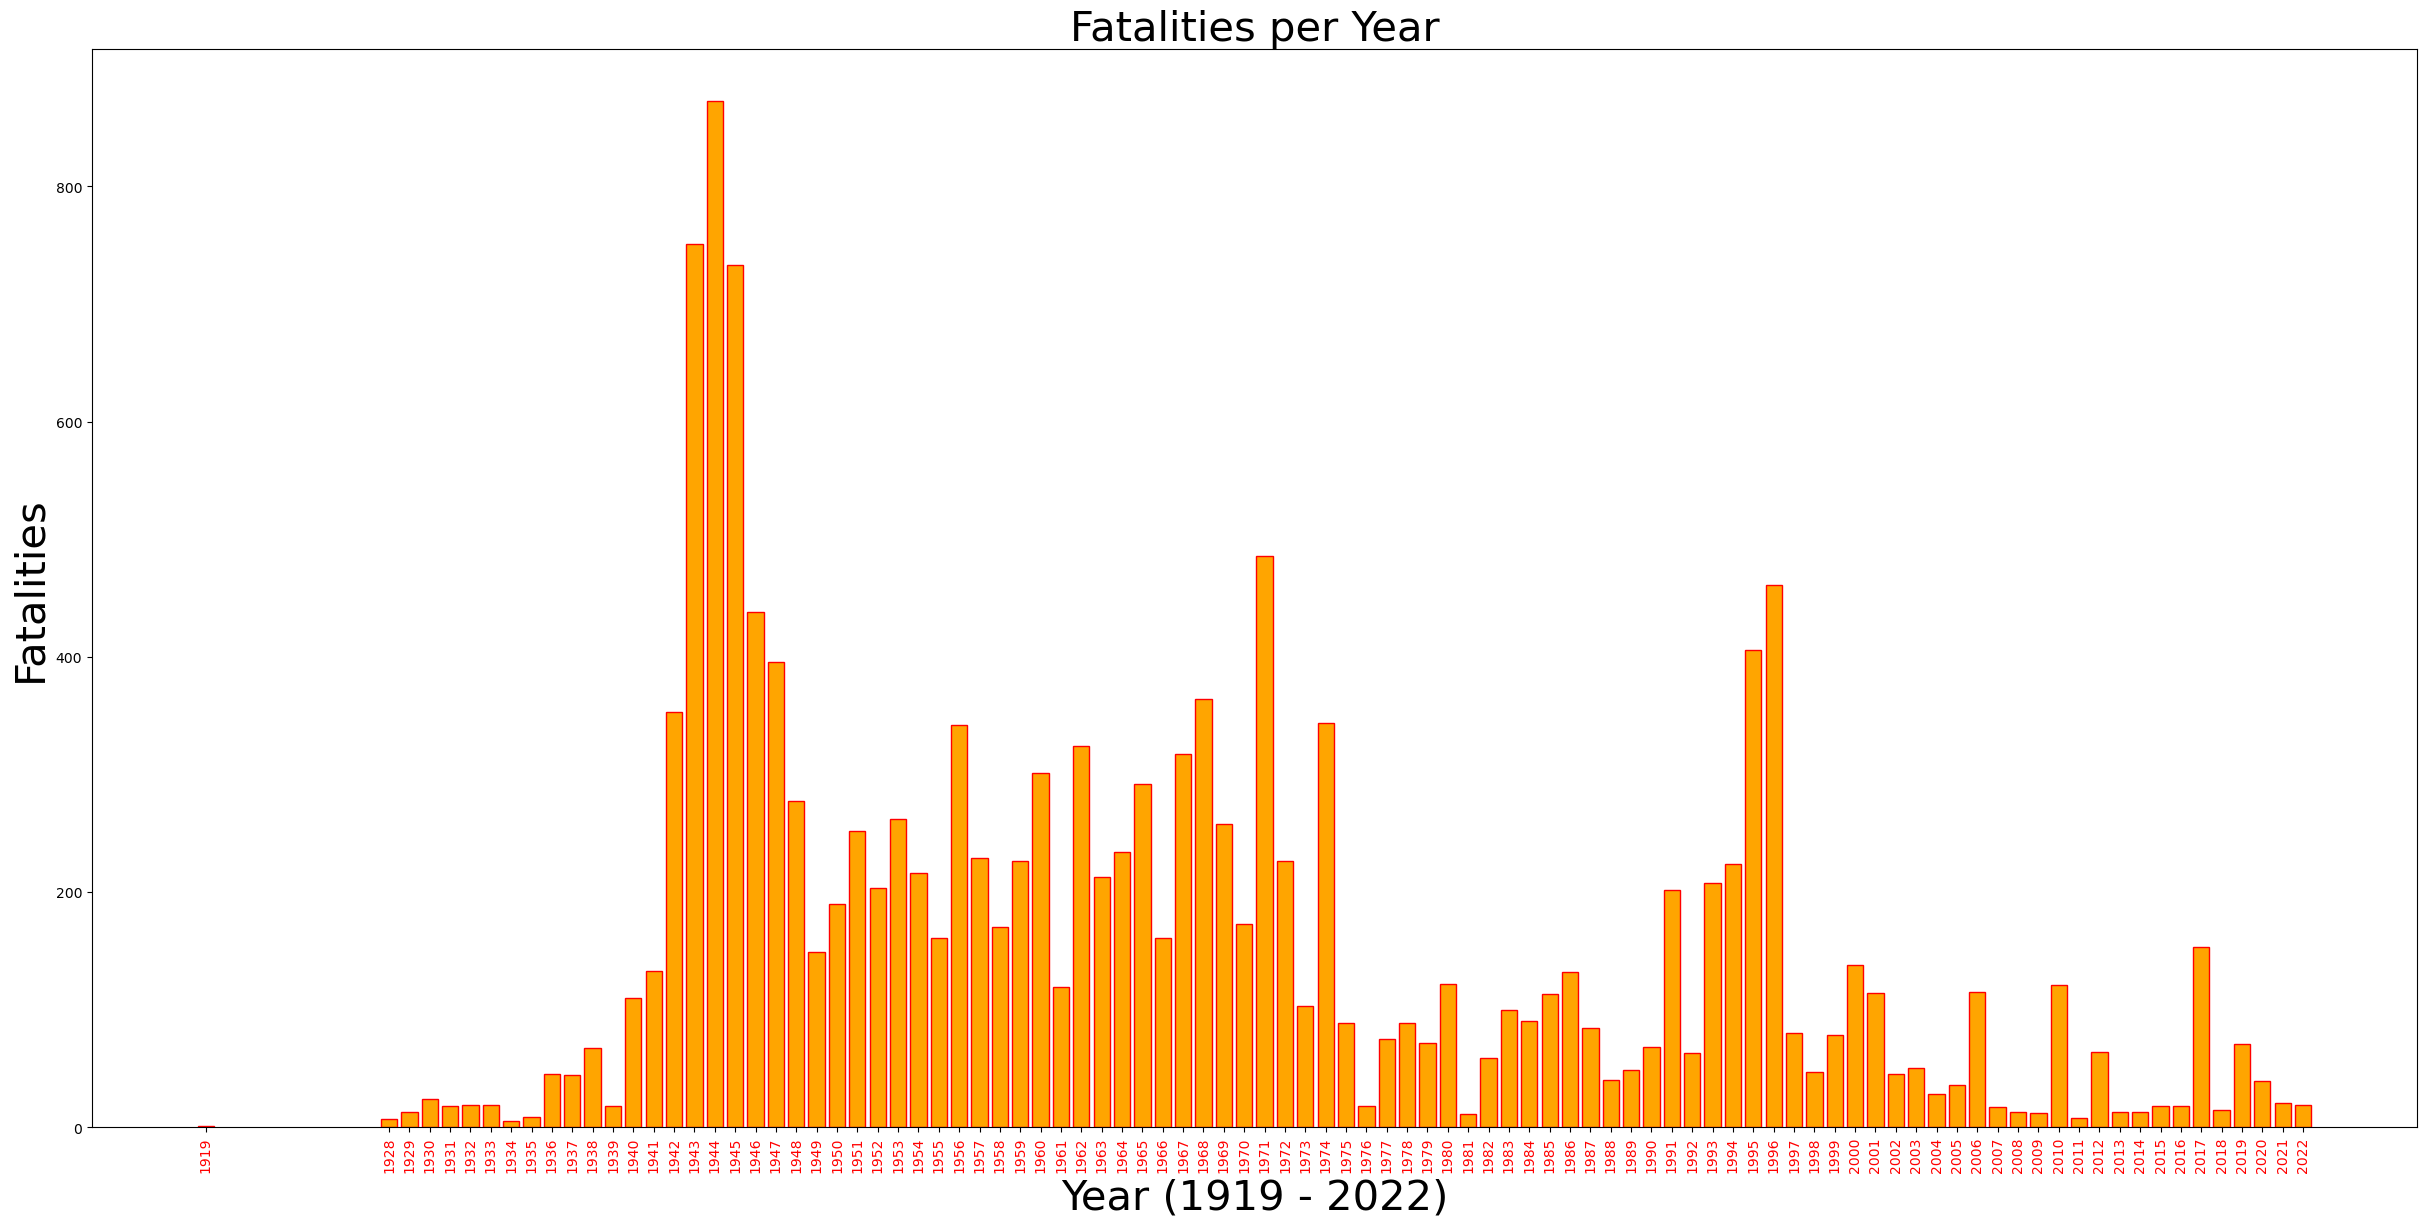

In [11]:
result = year_df.groupby('Year').sum()
years = year_df['Year'].unique().tolist()
plt.figure(figsize=(30, 14))

plt.bar(years, result['fatalities'], color="orange", edgecolor="red")
plt.xticks(years, rotation='vertical', color="red")
plt.title("Fatalities per Year", fontdict={"fontsize":30})
plt.xlabel("Year (1919 - 2022)", fontdict={"fontsize":30})
plt.ylabel("Fatalities", fontdict={"fontsize":30})

plt.show()

<h2 style="font-size:3rem; color:green">Which operator has the highest accidents with fatalities?</h2> 

# Creating a New Data Frame with Operator and Fatalities

In [12]:
select = civ1_df[['operator', 'fatalities']]
op_df = pd.DataFrame(select)
op_df.head()

,operator,fatalities
62,RAF,1
100,Ford Air Freight Lines,2
104,Stout Air Services,0
106,Sunbeam Air Transport Co.,5
108,Texaco,0


# Converting to the correct data types

In [13]:
op_df['fatalities'] = op_df['fatalities'].astype('int32')

# Creating a list of operators and fatalities

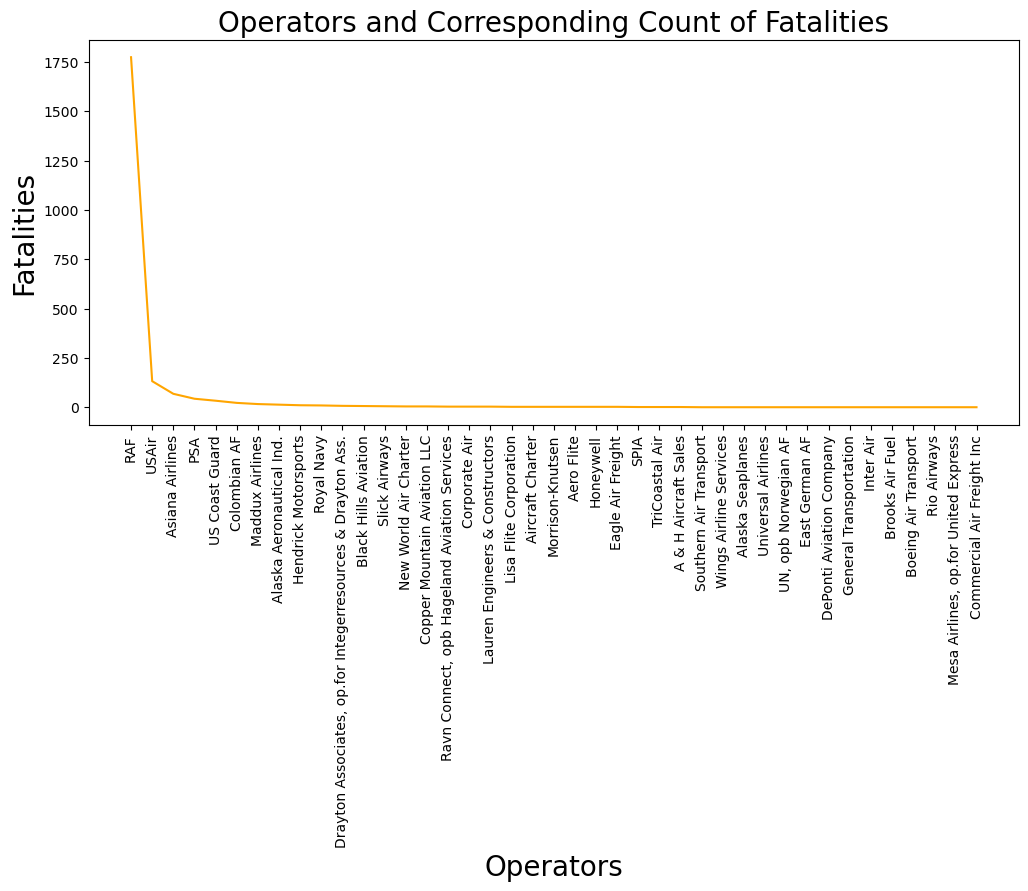

In [15]:
result = op_df.groupby('operator').sum()
operators = op_df['operator'].unique().tolist()

sorted_operators = result['fatalities'].sort_values(ascending=False)
selected_operators = sorted_operators.index[::20]

plt.figure(figsize=(12, 5))

plt.title("Operators and Corresponding Count of Fatalities", fontdict={'fontsize':20})
plt.xlabel("Operators", fontdict={'fontsize':20})
plt.ylabel("Fatalities", fontdict={'fontsize':20})
plt.plot(selected_operators, sorted_operators[selected_operators], color='orange')
plt.xticks(selected_operators, rotation='vertical')

plt.show()

<h2 style="font-size:3rem; color:green">Which aircraft saw the highest accidents with fatalities?</h2> 

# Creating a new data frame containing fatalities and aircraft

In [23]:
select = civ1_df[['fatalities', 'type']]
loc_df = pd.DataFrame(select)
loc_df['fatalities'] = loc_df['fatalities'].astype('int32')
loc_df.head()

,fatalities,type
62,1,Felixstowe Fury
100,2,Ford 4-AT-A Tri-Motor
104,0,Ford 4-AT-A Tri-Motor
106,5,Ford 4-AT-C Tri-Motor
108,0,Ford 4-AT-A Tri-Motor


<h2 style="font-size:4rem; color:orange">Plotting Type against Fatalities</h2>

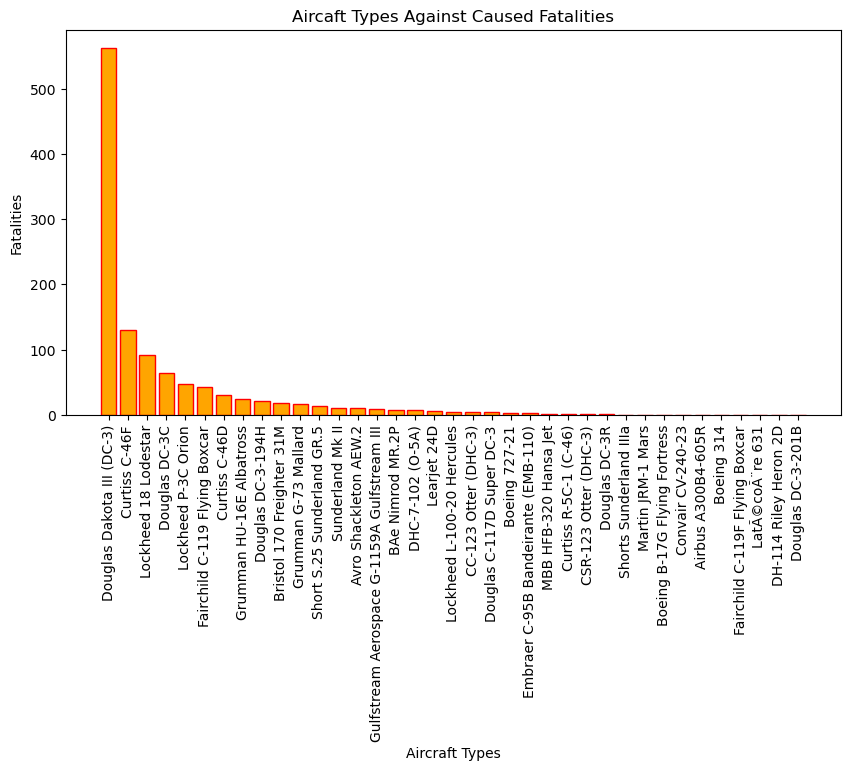

In [64]:
result = loc_df.groupby('type').sum()
craft = loc_df['type'].unique().tolist()

sorted_craft = result['fatalities'].sort_values(ascending=False)
selected_operators = sorted_craft.index[::20]

plt.figure(figsize=(10, 5))

plt.bar(selected_operators, sorted_craft[selected_operators], color='orange', edgecolor='red')
plt.xticks(selected_operators, rotation='vertical')
plt.title('Aircaft Types Against Caused Fatalities')
plt.xlabel('Aircraft Types')
plt.ylabel('Fatalities')

plt.show()

<h2 style="font-size:3rem; color:green">Which country saw the highest accidents with fatalities?</h2> 

# Creating a new dataframe with the columns fatalities and country

In [67]:
select = civ1_df[['country', 'fatalities']]
cou_df = pd.DataFrame(select)
cou_df['fatalities'] = cou_df['fatalities'].astype('int32')
cou_df.head()

,country,fatalities
62,U.K.,1
100,USA,2
104,USA,0
106,USA,5
108,USA,0


<h2 style="font-size:4rem; color:orange">Plotting Country against Fatalities</h2>

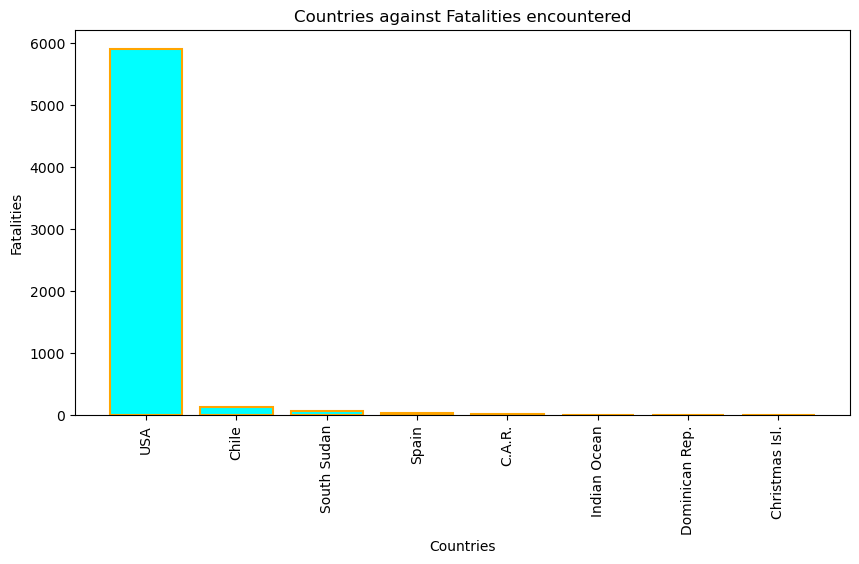

In [90]:
result = cou_df.groupby('country').sum()
country = cou_df['country'].unique().tolist()

sorted_countries = result['fatalities'].sort_values(ascending=False)
selected_countries = sorted_countries.index[::20]

plt.figure(figsize=(10, 5))
plt.bar(selected_countries, sorted_countries[selected_countries], color='cyan', edgecolor='orange', linewidth=1.5)
plt.xticks(selected_countries, rotation='vertical')
plt.title('Countries against Fatalities encountered')
plt.xlabel("Countries")
plt.ylabel("Fatalities")

plt.show()

<h2 style="font-size:3rem; color:green">Which country is the highest user of the Douglas Dakota lll?</h2> 

# Creating a new dataframe containing type and country

In [95]:
select = civ1_df[['type', 'country']]
doug1_df = pd.DataFrame(select)
doug1_df.head()

,type,country
62,Felixstowe Fury,U.K.
100,Ford 4-AT-A Tri-Motor,USA
104,Ford 4-AT-A Tri-Motor,USA
106,Ford 4-AT-C Tri-Motor,USA
108,Ford 4-AT-A Tri-Motor,USA


# Filtering out the Douglas Dakota III

In [103]:
filter_df = doug1_df[doug1_df['type'] == 'Douglas Dakota III (DC-3)']
filter_df.head()

,type,country
1944,Douglas Dakota III (DC-3),Greece
1945,Douglas Dakota III (DC-3),Greece
1946,Douglas Dakota III (DC-3),Greece
1947,Douglas Dakota III (DC-3),Greece
2132,Douglas Dakota III (DC-3),U.K.


<h2 style="font-size:4rem; color:orange">Plotting Country against Count of Douglas Dakota</h2>

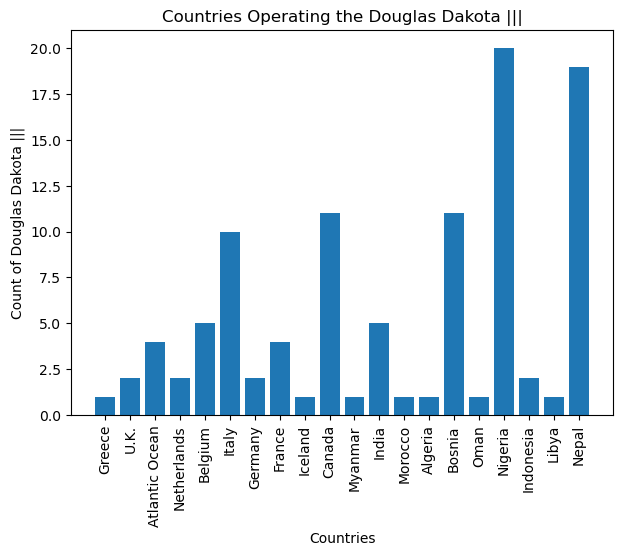

In [110]:
result = filter_df.groupby('country').count()
countries_list = filter_df['country'].unique().tolist()

plt.figure(figsize=(7,5))
plt.bar(countries_list, result['type'])
plt.title('Countries Operating the Douglas Dakota |||')
plt.xlabel("Countries")
plt.ylabel("Count of Douglas Dakota |||")
plt.xticks(countries_list, rotation='vertical')

plt.show()